# **Vehicle Performance Prediction**

## Abstract

Most players in the automotive sector are investing in ML for their marketing efforts, a
much smaller group is putting in place incentives and key performance indicators
(KPIs) to use more ML and automation. Closing the gap requires a stronger commitment
to developing ML capability that is not just useful but also used.

## Problem Statement

Use regression analysis to predict vehicle performance (mileage i.e kilometre travelled
per litre)

## Table of Content

<div class="alert alert-block alert-info">
    <ul>
        <li><a href="#eda">Exploratory Data Analysis</a></li>
        <li><a href="#var-analysis">Variable Analysis</a></li>
        <li><a href="#modelling">Data Modelling</a></li>
    </ul>
</div>

## Import Dependencies and Dataset

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_absolute_error

import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# loading dataset into a dataframe
path = 'Dataset/data.csv'

df = pd.read_csv(path)

display(df.shape)
df.head()

(398, 9)

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


## <div id="eda"></div>&#9724; Exploratory Data Analysis

### Handling Missing Value

<p>In the below cell we have a code which will check if there is any Nan value in entire dataset. If there is any missing data the code will return value $>$ 0.</p>

<p>If value is greater than zero we will look for missing value in individual column.</p>

In [3]:
# code to check missing value in entire dataset
np.sum(df.isna().sum())

0

So, after execution of above cell we know that there is no missing value in the dataset.

Next step is to check the datatype of data that each column contains.

In [4]:
# listing datatype of value the columns contains
df.dtypes

origin                   int64
cylinders                int64
displacement           float64
horsepower              object
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
dtype: object

<p>Above code shows us the datatype of column horsepower is object, but horsepower should be a numeric field.</p>

In [5]:
# Finding illegal character that exist in column horsepower
for value in df['horsepower']:
    if value.isnumeric():
        continue
    print(value)

?
?
?
?
?
?


<p>So, we can see that we have few illegal character in horsepower column.</p>

<p>Lets replace the '?' with mean value for respected cylinders.</p>

#### Missing value treatment

In [6]:
# replacing '?' with Nan value
df['horsepower'].replace({'?':np.nan}, inplace=True)

# converting the datatypes of horsepower value from string to int
df['horsepower'] = pd.to_numeric(df['horsepower'])

# filling Nan value with mean horspower value groupped by cylinder space
df['horsepower'] = df.groupby('cylinders')['horsepower'].transform(lambda x:x.fillna(x.mean()))

## <div id="var-analysis"></div>&#9724; Variable Analysis

#### Numerical Variable Analysis

As we know a vehicle is described by its horsepower, So here Horsepower can be our potential feature in predecting kilometers per litre, Also the mileage depends on the weight of the vechile.

So, we can consider Weight and Horsepower as our potential predictors.

Lets start with horsepower,

#### Horsepower vs Kilometer_per_litre

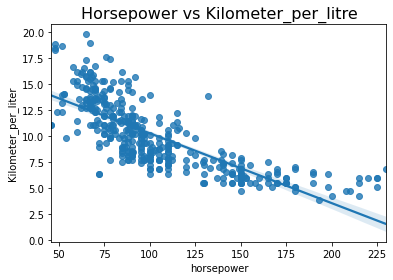

In [7]:
# plotting horsepower with respect to Kilometer per litre
sns.regplot(x='horsepower', y='Kilometer_per_liter', data=df)
plt.title('Horsepower vs Kilometer_per_litre', fontsize=16)
plt.show()

From above graph we can see that the horsepower is negatively correalted with Kilometer_per_liter. Let's check the score of relation.

In [8]:
# finding correlation value
df[['horsepower', 'Kilometer_per_liter']].corr()

,horsepower,Kilometer_per_liter
horsepower,1.000000,-0.775608
Kilometer_per_liter,-0.775608,1.000000


<p>~ -0.776 which means horsepower has strong negative correlation with Kilometer per liter.</p>

#### Weight vs Kilometer_per_litre

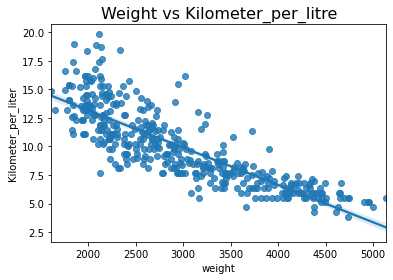

In [9]:
# plotting weight with respect to Kilometer per litre
sns.regplot(x='weight', y='Kilometer_per_liter', data=df)
plt.title('Weight vs Kilometer_per_litre', fontsize=16)
plt.show()

From above graph we can see that the weight is negatively correalted with Kilometer_per_liter. Let's check the score of relation.

In [10]:
# finding correlation value
df[['weight', 'Kilometer_per_liter']].corr()

,weight,Kilometer_per_liter
weight,1.000000,-0.831741
Kilometer_per_liter,-0.831741,1.000000


<p>~ -0.832 which means weight has strong negative correlation with Kilometer per liter.</p>

#### Displacement vs Kilometer_per_litre

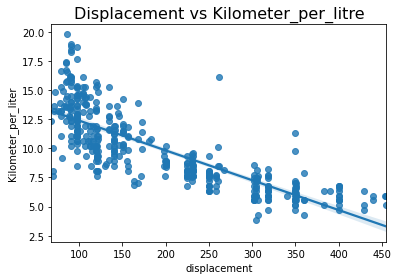

In [11]:
# plotting displacement with respect to Kilometer per litre
sns.regplot(x='displacement', y='Kilometer_per_liter', data=df)
plt.title('Displacement vs Kilometer_per_litre', fontsize=16)
plt.show()

From above graph we can see that the displacement is negatively correalted with Kilometer_per_liter. Let's check the score of relation.

In [12]:
# finding correlation value
df[['displacement', 'Kilometer_per_liter']].corr()

,displacement,Kilometer_per_liter
displacement,1.000000,-0.804203
Kilometer_per_liter,-0.804203,1.000000


<p>-0.804 which means displacement has strong negative correlation with Kilometer per liter.</p>

#### Acceleration vs Kilometer_per_litre

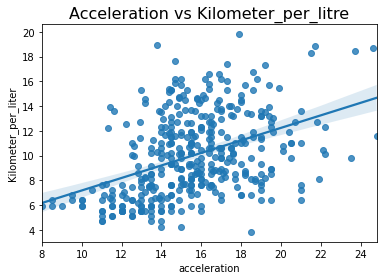

In [13]:
# plotting acceleration with respect to Kilometer per litre
sns.regplot(x='acceleration', y='Kilometer_per_liter', data=df)
plt.title('Acceleration vs Kilometer_per_litre', fontsize=16)

plt.show()

From above graph we can see that the acceleration has positive correlation with Kilometer_per_liter. Let's check the score of relation.

In [14]:
# finding correlation value
df[['acceleration', 'Kilometer_per_liter']].corr()

,acceleration,Kilometer_per_liter
acceleration,1.000000,0.420289
Kilometer_per_liter,0.420289,1.000000


<p>0.420 which means acceleration has some positive correlation with Kilometer per liter but isn't highly correlated.</p>

In numerical variable we have two more feature i.e year and origin.
These looks numerical but acts as categorical. Below code will show the behaviour of these two feature.

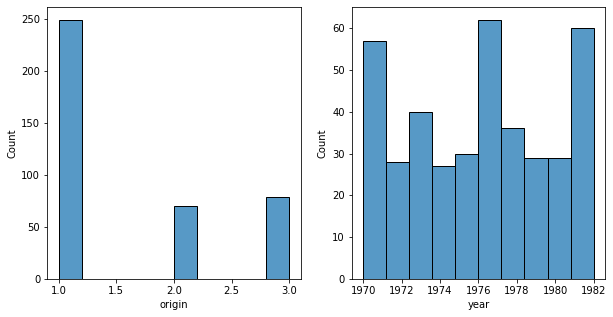

In [15]:
plt.figure(figsize=(10,5))

ax1 = plt.subplot(1,2,1)
sns.histplot(df['origin'], ax=ax1)

ax2 = plt.subplot(1,2,2)
sns.histplot(df['year'], ax=ax2)

plt.show()

Origin is truly categorical data, so we will dealt with it in categrical analysis. But for now we will look over year feature. The year feature can be converted to numerical by showing that how old the car model is.

i.e We are going to find out the difference in car manufactured year from today.

In [16]:
# below we convert the manufacture year to how old the car is
df['year'] = df['year'].apply(lambda x: 2021 - x)

lets look over the correlation of year vs Kmpl

In [17]:
# finding correlation value
df[['year', 'Kilometer_per_liter']].corr()

,year,Kilometer_per_liter
year,1.000000,-0.579267
Kilometer_per_liter,-0.579267,1.000000


So we can use the year feature as it show some effect to mileage by correlation value of ~ -0.580.

### Categorical Data Analysis

#### Origin weight count

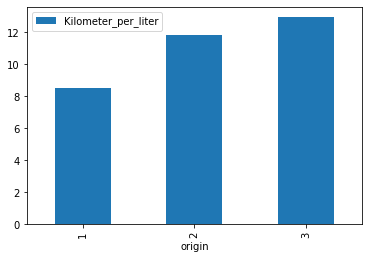

In [18]:
# countplot for origin
group_data = df[['origin', 'Kilometer_per_liter']].groupby('origin').mean()
group_data.plot(kind='bar')
plt.show()

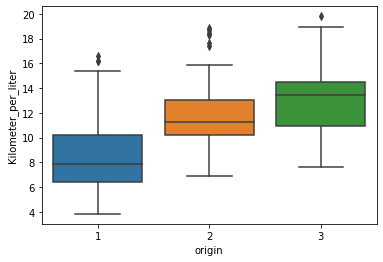

In [19]:
sns.boxplot(df['origin'], df['Kilometer_per_liter'])
plt.show()

We can use origin for vehicle performance predictor

In [20]:
# code to extract brand name from car name
df['name'] = df['name'].apply(lambda name : re.search(r'\w+', name).group())
df['name'].head()

0    chevrolet
1        buick
2     plymouth
3          amc
4         ford
Name: name, dtype: object

In [21]:
# checking for uniquw brand name
df['name'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw', 'mercedes',
       'cadillac', 'vokswagen', 'triumph', 'nissan'], dtype=object)

Above cell shows some of the brand name repeated beacuse of misspell. So we are going to replace the brand and with actual name.

In [22]:
rename_car = {"toyouta": "toyota", "maxda": "mazda", "vokswagen": "volkswagen", "vw": "volkswagen"}
df['name'].replace(rename_car, inplace = True)
df['name'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'honda',
       'subaru', 'chevroelt', 'capri', 'mercedes', 'cadillac', 'triumph',
       'nissan'], dtype=object)

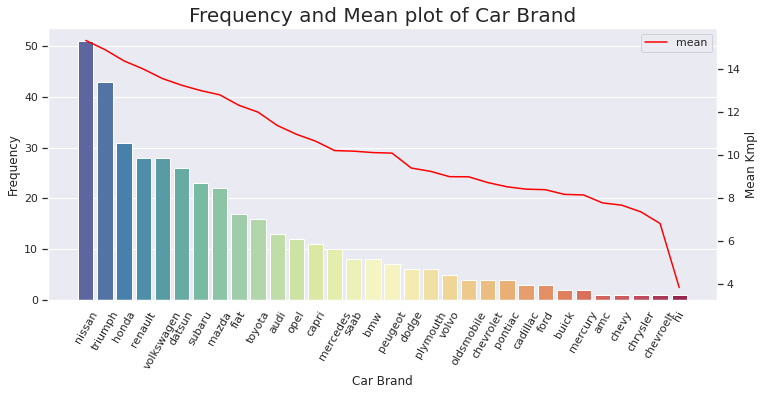

In [23]:
fig = plt.figure(figsize=(12,5))
sns.set()

ax1 = fig.add_subplot(111)

grouped_data_count = df[['name', 'Kilometer_per_liter']].groupby('name',as_index=False).count().sort_values(by="Kilometer_per_liter", ascending=False)
pl = sns.barplot(grouped_data_count['name'], grouped_data_count['Kilometer_per_liter'], palette="Spectral_r", label='frequency')
plt.ylabel('Frequency')
plt.xlabel('Car Brand')

ax2 = ax1.twinx()
grouped_data_mean = df[['name', 'Kilometer_per_liter']].groupby('name',as_index=False).mean().sort_values(by="Kilometer_per_liter", ascending=False)
sns.lineplot(grouped_data_mean['name'], grouped_data_mean['Kilometer_per_liter'], color="red", ax=ax2, label='mean')
ax2.grid(False)
plt.ylabel('Mean Kmpl')

plt.legend()
plt.title("Frequency and Mean plot of Car Brand", fontsize=20)
plt.setp(pl.get_xticklabels(), rotation=60)
plt.show()

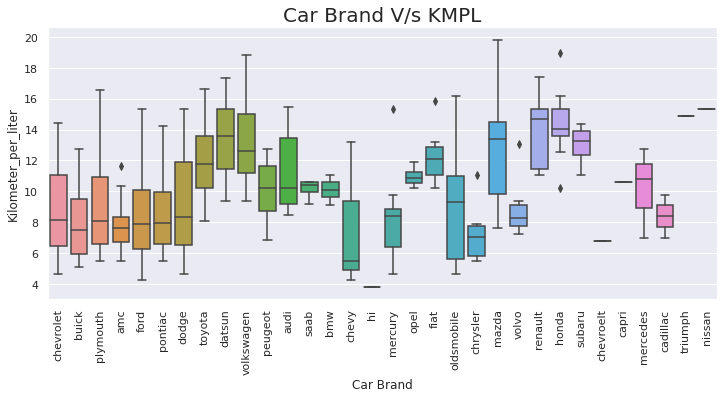

In [24]:
plt.figure(figsize=(12,5))
sns.boxplot(df['name'], df['Kilometer_per_liter'])

plt.title('Car Brand V/s KMPL', fontsize=20)
plt.xlabel('Car Brand')
plt.xticks(rotation=90)
plt.show()

<p>After seeing the barplot the brand name doesn't seems to be a good predictor for predicting the mileage of a car here, because most of median lies in same line.</p>

### Correlation

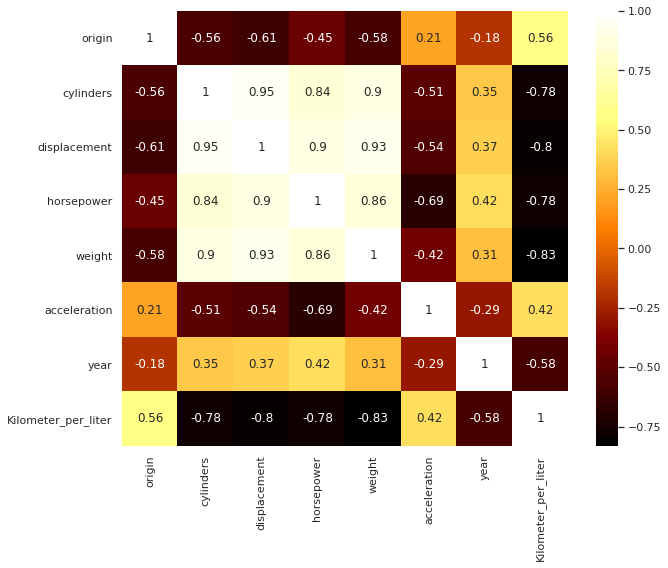

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="afmhot")
plt.show()

#### In above heatmap there can be seen some good correlation for the feature that we have test individually before.

#### Also there is one feature which show the multi-collinearity.

Acceleration is highly colinear to other 4 feature, which are cylinders, dispalcement, horsepower, weight.
So we are going to avoid the use of acceleartion feature for model building.

### We can conclude that:

+ **Numerical Variable**
    + horsepower
    + weight
    + displacement
    + year
    + cylinders


+ **Categorical Variable**
    + origin
    
### are good predictors and can be used for model building.

### Save data for modelling

In [26]:
vehicle = df[['origin', 'cylinders', 'horsepower', 'weight', 'displacement', 'year', 'Kilometer_per_liter']]

In [27]:
# saving the dataframe
vehicle.to_csv('Dataset/vehicle.csv')

## <div id="modelling"></div>&#9724; Data Modelling - will be added soon